In [7]:
import ccxt
import pandas as pd
import datetime
from ta.momentum import RSIIndicator
from binance.client import Client
import mplfinance as mpf
import ta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# replace YOUR_API_KEY and YOUR_SECRET_KEY with your own keys
api_key = 'YZcPGzrU0KH6vSSmFXsf9utujHWl7YBm2i4trYynDo1kFPrI9PeYzXAzZHvMTfgq'
api_secret = '0eSdyRpYw3yMg6TszataVnvYH8w3IZ78p6EicZMufgIefytMHgL22hdtfQe7XupI'

# create a Binance client object
client = Client(api_key, api_secret)

# Get klines (candlestick) data for the past day
klines = client.get_historical_klines(
    "BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "25 March, 2023", "29 March, 2023")
# print(klines)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
                  'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# Convert the timestamp to a human-readable format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df.close = df.close.astype(float)
df.high = df.high.astype(float)
df.low = df.low.astype(float)
df.volume = df.volume.astype(float)
df.open = df.open.astype(float)

# Set the timestamp as the index of the DataFrame
df.set_index('timestamp', inplace=True)
# mpf.plot(df, type='candle', title='BTCUSDT Price', ylabel='Price', volume=True)



In [8]:

# Initialize Binance API
binance = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
})

# Get historical price data (OHLCV) for Bitcoin
timeframe = '4h'
symbol = 'BTC/USDT'
since = binance.parse8601((datetime.datetime.now(
) - datetime.timedelta(days=30)).strftime('%Y-%m-%dT%H:%M:%SZ'))

ohlcv = binance.fetch_ohlcv(symbol, timeframe, since)

# Convert data to pandas DataFrame
df = pd.DataFrame(
    ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate RSI
# rsi_period = 14
# rsi_indicator = RSIIndicator(df['low'], rsi_period)
# df['rsi'] = rsi_indicator.rsi()

# Find RSI divergences
# divergences = rsi_divergence(df['low'], df['rsi'], rsi_period)
# print(divergences)
# print(convert_to_time((76, 168), df))

df.close = df.close.astype(float)
df.high = df.high.astype(float)
df.low = df.low.astype(float)
df.volume = df.volume.astype(float)
df.open = df.open.astype(float)

# ap0 = [
#     # mpf.make_addplot(df['rsi'], color='#ffa500', panel=0, title="RSI"),
# ]


# Set the timestamp as the index of the DataFrame
df.set_index('timestamp', inplace=True)
# mpf.make_addplot(df['rsi'], color='#ffa500', panel=0, title="RSI")


def minPivotPoints(prices, length_left=10, length_right=10):
    if len(prices) == 0:
        return []

    pivot_points = []
    for i in range(length_left, len(prices) - length_right - 1):
        local_min = min(prices[i - length_left: i + length_right])
        if prices[i] == local_min:
            pivot_points.append(i)

    # remove duplicate pivot points
    tmp = pivot_points.copy()
    for i in range(len(tmp) - 1):
        if tmp[i + 1] - tmp[i] < length_right:
            del pivot_points[i + 1]

    return pivot_points


# print(minPivotPoints(df['low']))

minPointsArr = minPivotPoints(df['low'])
print(minPointsArr)

[16, 91, 108, 151]


In [11]:
df['lowPointed']

timestamp
2023-04-06 16:00:00    27950.90
2023-04-06 20:00:00    27900.00
2023-04-07 00:00:00    27926.52
2023-04-07 04:00:00    27766.94
2023-04-07 08:00:00    27785.00
                         ...   
2023-05-05 16:00:00    29315.78
2023-05-05 20:00:00    29450.69
2023-05-06 00:00:00    29337.83
2023-05-06 04:00:00    29250.65
2023-05-06 08:00:00    29132.14
Name: low, Length: 179, dtype: float64

In [ ]:
df['low']

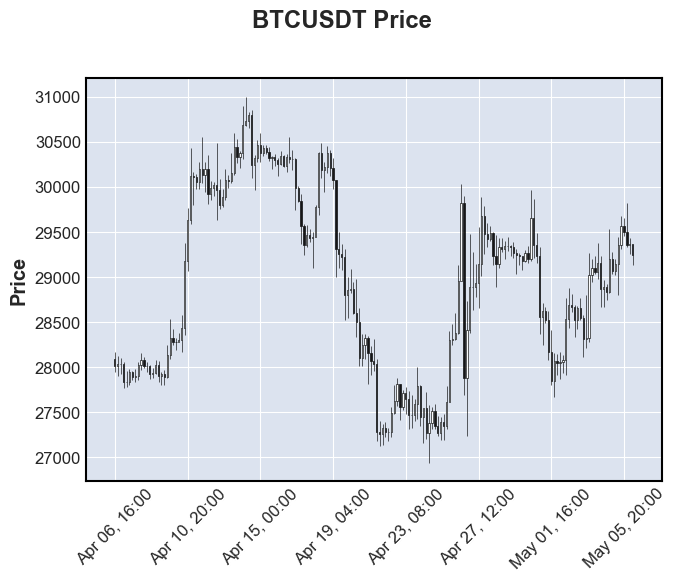

In [12]:
ap0 = [
    # mpf.make_addplot(df['rsi'], color='#ffa500', panel=0, title="RSI"),
]


mpf.plot(df, type='candle', title='BTCUSDT Price', addplot=ap0,
         ylabel='Price')